<a href="https://colab.research.google.com/github/punramon/python_dataviz2024/blob/main/HW8_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#นำเข้าข้อมูล

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path_to_movie = '/content/drive/MyDrive/data_viz_2024_DATA/IMDb Movies India.csv'

In [5]:
movie_df = pd.read_csv(path_to_movie, encoding='latin-1')
movie_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# จัดการข้อมูล

In [6]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
#ตรวจสอบค่า null
movie_df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [8]:
# หา mode ของคอลัมน์ Year
year_mode = movie_df['Year'].mode()[0]
year_mode


'(2019)'

In [9]:
# เติมค่า mode ลงในช่องว่างของคอลัมน์ Year
movie_df['Year'] = movie_df['Year'].fillna(year_mode)


In [10]:
#ตรวจสอบค่า null
movie_df.isnull().sum()

,0
Name,0
Year,0
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [11]:
movie_df = movie_df.dropna(subset=['Rating','Duration','Genre'])
movie_df = movie_df[['Name' ,'Year','Genre','Rating','Duration']]
movie_df

,Name,Year,Genre,Rating,Duration
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,109 min
3,#Yaaram,(2019),"Comedy, Romance",4.4,110 min
5,...Aur Pyaar Ho Gaya,(1997),"Comedy, Drama, Musical",4.7,147 min
6,...Yahaan,(2005),"Drama, Romance, War",7.4,142 min
8,?: A Question Mark,(2012),"Horror, Mystery, Thriller",5.6,82 min
...,...,...,...,...,...
15493,Zubaan,(2015),Drama,6.1,115 min
15494,Zubeidaa,(2001),"Biography, Drama, History",6.2,153 min
15503,Zulm Ki Zanjeer,(1989),"Action, Crime, Drama",5.8,125 min
15505,Zulmi,(1999),"Action, Drama",4.5,129 min


In [12]:
#ตรวจสอบค่า null
movie_df.isnull().sum()

,0
Name,0
Year,0
Genre,0
Rating,0
Duration,0


In [13]:
#หลังdropnaแล้วข้อมูลเหลือกี่%จากเดิม

print(f"ข้อมูลเหลือ {(len(movie_df) / len(pd.read_csv('/content/drive/MyDrive/data_viz_2024_DATA/IMDb Movies India.csv', encoding='latin-1'))) * 100:.2f}% จากเดิม")

ข้อมูลเหลือ 37.53% จากเดิม


In [14]:
movie_df['Year'] = movie_df['Year'].str.replace('(', '').str.replace(')', '').astype(int)
movie_df['Duration'] = movie_df['Duration'].str.replace(' min', '').astype(int)
movie_df

,Name,Year,Genre,Rating,Duration
1,#Gadhvi (He thought he was Gandhi),2019,Drama,7.0,109
3,#Yaaram,2019,"Comedy, Romance",4.4,110
5,...Aur Pyaar Ho Gaya,1997,"Comedy, Drama, Musical",4.7,147
6,...Yahaan,2005,"Drama, Romance, War",7.4,142
8,?: A Question Mark,2012,"Horror, Mystery, Thriller",5.6,82
...,...,...,...,...,...
15493,Zubaan,2015,Drama,6.1,115
15494,Zubeidaa,2001,"Biography, Drama, History",6.2,153
15503,Zulm Ki Zanjeer,1989,"Action, Crime, Drama",5.8,125
15505,Zulmi,1999,"Action, Drama",4.5,129


In [15]:
# Define a function to categorize duration
def categorize_duration(duration):
  if duration < 60:
    return 'short'
  elif 60 <= duration <= 90:
    return 'medium'
  else:
    return 'long'

# Apply the function to create a new column 'Duration Category'
movie_df['Duration Category'] =movie_df['Duration'].apply(categorize_duration)
movie_df

,Name,Year,Genre,Rating,Duration,Duration Category
1,#Gadhvi (He thought he was Gandhi),2019,Drama,7.0,109,long
3,#Yaaram,2019,"Comedy, Romance",4.4,110,long
5,...Aur Pyaar Ho Gaya,1997,"Comedy, Drama, Musical",4.7,147,long
6,...Yahaan,2005,"Drama, Romance, War",7.4,142,long
8,?: A Question Mark,2012,"Horror, Mystery, Thriller",5.6,82,medium
...,...,...,...,...,...,...
15493,Zubaan,2015,Drama,6.1,115,long
15494,Zubeidaa,2001,"Biography, Drama, History",6.2,153,long
15503,Zulm Ki Zanjeer,1989,"Action, Crime, Drama",5.8,125,long
15505,Zulmi,1999,"Action, Drama",4.5,129,long


In [16]:
# prompt: แบ่ง Year ออกเป็น 1931-1940 เป็น 'Sound Era'  1941-1969 เป็น 'Golden Era'  1970-1990 เป็น 'Masala Era'  1991-2000 เป็น 'New Wave Era'  2001-2021 เป็น 'Contemporary Era'

def categorize_year(year):
  if 1931 <= year <= 1940:
    return 'Sound Era'
  elif 1941 <= year <= 1969:
    return 'Golden Era'
  elif 1970 <= year <= 1990:
    return 'Masala Era'
  elif 1991 <= year <= 2000:
    return 'New Wave Era'
  else:
    return 'Contemporary Era'

# Apply the function to create a new column 'Era'
movie_df['Era'] = movie_df['Year'].apply(categorize_year)
movie_df

,Name,Year,Genre,Rating,Duration,Duration Category,Era
1,#Gadhvi (He thought he was Gandhi),2019,Drama,7.0,109,long,Contemporary Era
3,#Yaaram,2019,"Comedy, Romance",4.4,110,long,Contemporary Era
5,...Aur Pyaar Ho Gaya,1997,"Comedy, Drama, Musical",4.7,147,long,New Wave Era
6,...Yahaan,2005,"Drama, Romance, War",7.4,142,long,Contemporary Era
8,?: A Question Mark,2012,"Horror, Mystery, Thriller",5.6,82,medium,Contemporary Era
...,...,...,...,...,...,...,...
15493,Zubaan,2015,Drama,6.1,115,long,Contemporary Era
15494,Zubeidaa,2001,"Biography, Drama, History",6.2,153,long,Contemporary Era
15503,Zulm Ki Zanjeer,1989,"Action, Crime, Drama",5.8,125,long,Masala Era
15505,Zulmi,1999,"Action, Drama",4.5,129,long,New Wave Era


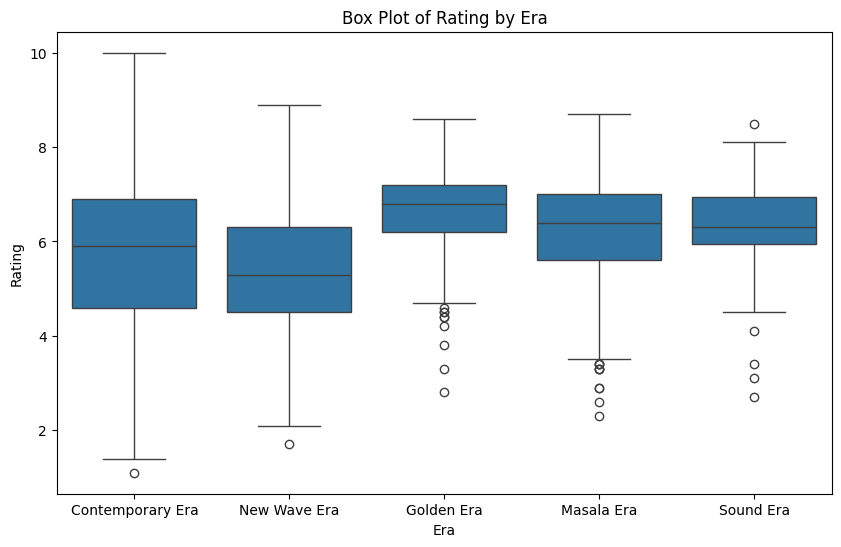

In [17]:
# prompt: ทำ box plot ของ Rating แยกแต่ละ Era

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Era', y='Rating', data=movie_df)
plt.title('Box Plot of Rating by Era')
plt.xlabel('Era')
plt.ylabel('Rating')
plt.show()


* มี outlier ในบางยุค จึงเลือกใช้ median

In [18]:
movie_bar = movie_df.groupby(['Era','Duration Category',])['Rating'].median().unstack()
movie_bar

Duration Category,long,medium,short
Era,,,
Contemporary Era,5.70,6.6,6.70
Golden Era,6.80,6.5,6.45
Masala Era,6.40,7.0,7.30
New Wave Era,5.30,6.7,7.00
Sound Era,6.35,6.2,NaN


In [19]:
# prompt: Using dataframe drama_bar: อยากให้เรียง Sound Era Golden Era Masala Era New Wave Era Contemporary Era

# Create a dictionary to map the desired order of eras
era_order = {
    "Sound Era": 0,
    "Golden Era": 1,
    "Masala Era": 2,
    "New Wave Era": 3,
    "Contemporary Era": 4
}

# Reset the index to make 'Era' a column
movie_bar = movie_bar.reset_index()

# Create a new column with the order values
movie_bar['era_order'] = movie_bar['Era'].map(era_order)

# Sort the dataframe based on the new column
movie_bar = movie_bar.sort_values('era_order')

# Drop the temporary column
movie_bar = movie_bar.drop('era_order', axis=1)

# Set 'Era' as index again
movie_bar = movie_bar.set_index('Era')

# Display the sorted dataframe
movie_bar

Duration Category,long,medium,short
Era,,,
Sound Era,6.35,6.2,NaN
Golden Era,6.80,6.5,6.45
Masala Era,6.40,7.0,7.30
New Wave Era,5.30,6.7,7.00
Contemporary Era,5.70,6.6,6.70


# Stacked Bar Chart

In [20]:
# prompt: create 'genre' that not contains  mixed genre
# Create a new DataFrame with single genres
single_genre_df = movie_df[~movie_df['Genre'].str.contains(',')]
single_genre_df

,Name,Year,Genre,Rating,Duration,Duration Category,Era
1,#Gadhvi (He thought he was Gandhi),2019,Drama,7.0,109,long,Contemporary Era
10,1:1.6 An Ode to Lost Love,2004,Drama,6.2,96,long,Contemporary Era
11,1:13:7 Ek Tera Saath,2016,Horror,5.9,120,long,Contemporary Era
30,15 Park Avenue,2005,Drama,7.1,116,long,Contemporary Era
32,15th August,1993,Drama,5.6,168,long,New Wave Era
...,...,...,...,...,...,...,...
15478,Zindagi Tere Naam,2012,Romance,4.4,120,long,Contemporary Era
15479,Zindagi Tumse,2019,Family,6.0,120,long,Contemporary Era
15482,Zindagi Zindabad,2000,Drama,5.7,140,long,New Wave Era
15488,Zoo,2018,Drama,5.7,100,long,Contemporary Era


In [21]:
single_genre_df.isnull().sum()

,0
Name,0
Year,0
Genre,0
Rating,0
Duration,0
Duration Category,0
Era,0


In [22]:
# prompt: groupby 'Genre' in single_genre_df
single_genre_df.groupby('Genre').size().sort_values(ascending=False).rename('Movies Count').head(5)

,Movies Count
Genre,
Drama,870
Comedy,191
Action,175
Romance,127
Thriller,87


In [23]:
# prompt: select single_genre_df isin ['Drama', 'Comedy', 'Action', 'Romance', 'Thriller']
selected_genres = ['Drama', 'Comedy', 'Action', 'Romance', 'Thriller']
selected_df = single_genre_df[single_genre_df['Genre'].isin(selected_genres)]
selected_df

,Name,Year,Genre,Rating,Duration,Duration Category,Era
1,#Gadhvi (He thought he was Gandhi),2019,Drama,7.0,109,long,Contemporary Era
10,1:1.6 An Ode to Lost Love,2004,Drama,6.2,96,long,Contemporary Era
30,15 Park Avenue,2005,Drama,7.1,116,long,Contemporary Era
32,15th August,1993,Drama,5.6,168,long,New Wave Era
34,18.11,2014,Action,3.5,126,long,Contemporary Era
...,...,...,...,...,...,...,...
15471,Zindagi Jalebi,2013,Comedy,3.7,117,long,Contemporary Era
15478,Zindagi Tere Naam,2012,Romance,4.4,120,long,Contemporary Era
15482,Zindagi Zindabad,2000,Drama,5.7,140,long,New Wave Era
15488,Zoo,2018,Drama,5.7,100,long,Contemporary Era


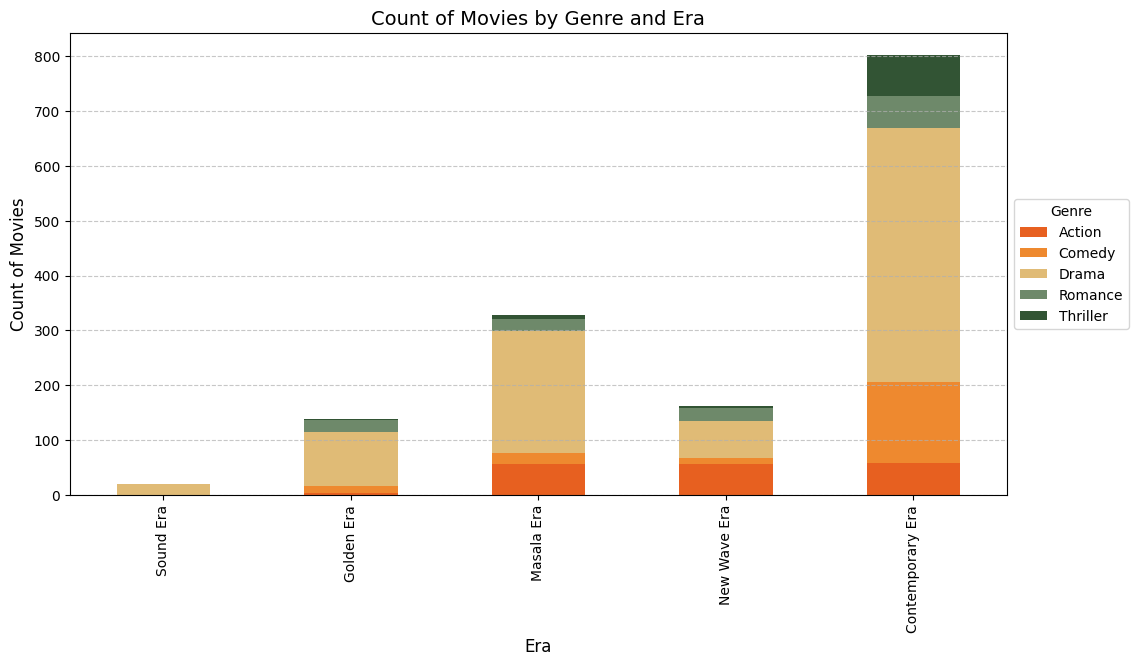

In [24]:
import matplotlib.pyplot as plt

# Define distinct custom colors for each genre
custom_colors = ['#E76020', '#EE892F', '#E0BB76', '#6E896A', '#325434']  # Add enough distinct colors

# Calculate the count of movies for each genre in each era
genre_count = selected_df.groupby(['Era', 'Genre'])['Name'].count().unstack()

# Create a dictionary to map the desired order of eras
era_order = {
    "Sound Era": 0,
    "Golden Era": 1,
    "Masala Era": 2,
    "New Wave Era": 3,
    "Contemporary Era": 4
}

# Reorder the index of the dataframe based on the era_order
genre_count = genre_count.reindex(era_order)

# Set the figure size to make the plot wider
plt.figure(figsize=(15, 6))

# Create a stacked bar chart with distinct colors
ax = genre_count.plot(kind='bar', stacked=True, ax=plt.gca(), color=custom_colors)

# Add x and y axis labels
plt.xlabel('Era', fontsize=12)  # Label for the x-axis
plt.ylabel('Count of Movies', fontsize=12)  # Label for the y-axis

# Add a title to the chart
plt.title('Count of Movies by Genre and Era', fontsize=14)

# Move the legend outside the plot to avoid overlap
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Genre')

# Adjust the space on the right to fit the legend
plt.gcf().subplots_adjust(right=0.75)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Add grid lines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [25]:
# prompt: perform crosstab on selected-data
pd.crosstab(selected_df['Genre'], selected_df['Era'])

Era,Contemporary Era,Golden Era,Masala Era,New Wave Era,Sound Era
Genre,,,,,
Action,58,4,56,57,0
Comedy,148,12,21,10,0
Drama,462,99,222,67,20
Romance,60,22,21,24,0
Thriller,74,1,8,4,0


# Group Bar Chart

In [26]:
drama_df = movie_df[movie_df['Genre'] == 'Drama']
drama_df

,Name,Year,Genre,Rating,Duration,Duration Category,Era
1,#Gadhvi (He thought he was Gandhi),2019,Drama,7.0,109,long,Contemporary Era
10,1:1.6 An Ode to Lost Love,2004,Drama,6.2,96,long,Contemporary Era
30,15 Park Avenue,2005,Drama,7.1,116,long,Contemporary Era
32,15th August,1993,Drama,5.6,168,long,New Wave Era
36,19 Revolutions,2004,Drama,4.5,94,long,Contemporary Era
...,...,...,...,...,...,...,...
15457,Zindagi,1940,Drama,7.0,120,long,Sound Era
15466,Zindagi Aur Maut,1965,Drama,6.0,134,long,Golden Era
15482,Zindagi Zindabad,2000,Drama,5.7,140,long,New Wave Era
15488,Zoo,2018,Drama,5.7,100,long,Contemporary Era


In [27]:
drama_bar = drama_df.groupby(['Era','Duration Category',])['Rating'].median().unstack()
drama_bar

Duration Category,long,medium,short
Era,,,
Contemporary Era,6.50,6.75,6.3
Golden Era,6.75,6.70,NaN
Masala Era,6.60,7.00,NaN
New Wave Era,6.10,6.25,NaN
Sound Era,6.50,6.30,NaN


In [28]:
# prompt: Using dataframe drama_bar: อยากให้เรียง Sound Era Golden Era Masala Era New Wave Era Contemporary Era

# Create a dictionary to map the desired order of eras
era_order = {
    "Sound Era": 0,
    "Golden Era": 1,
    "Masala Era": 2,
    "New Wave Era": 3,
    "Contemporary Era": 4
}

# Reset the index to make 'Era' a column
drama_bar = drama_bar.reset_index()

# Create a new column with the order values
drama_bar['era_order'] = drama_bar['Era'].map(era_order)

# Sort the dataframe based on the new column
drama_bar = drama_bar.sort_values('era_order')

# Drop the temporary column
drama_bar = drama_bar.drop('era_order', axis=1)

# Set 'Era' as index again
drama_bar = drama_bar.set_index('Era')

# Display the sorted dataframe
drama_bar

Duration Category,long,medium,short
Era,,,
Sound Era,6.50,6.30,NaN
Golden Era,6.75,6.70,NaN
Masala Era,6.60,7.00,NaN
New Wave Era,6.10,6.25,NaN
Contemporary Era,6.50,6.75,6.3


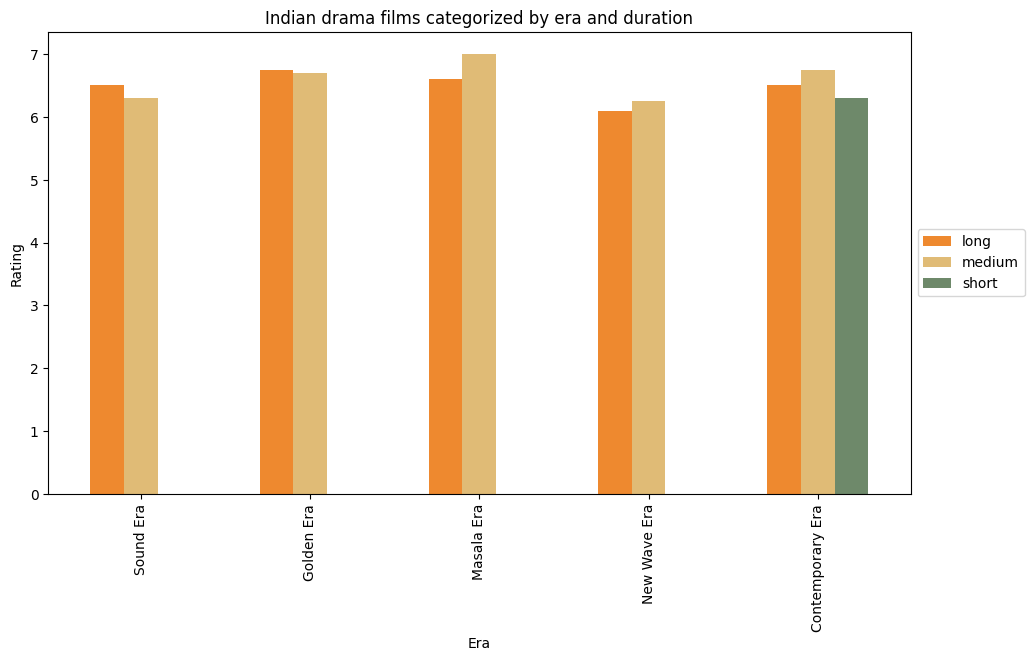

In [29]:
# Define distinct custom colors for each genre
custom_colors = ['#EE892F', '#E0BB76', '#6E896A']  # Add enough distinct colors

ax = drama_bar.plot(kind='bar', figsize=(15, 6), width=0.6, color=custom_colors)

# Add labels and title
plt.xlabel('Era')
plt.ylabel('Rating')
plt.title('Indian drama films categorized by era and duration')

# Move the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the plot size
plt.gcf().subplots_adjust(right=0.7)

# Show the plot
plt.show()